Reference:https://github.com/noorkhokhar99/Measure-size-of-objects-in-an-image-using-OpenCV

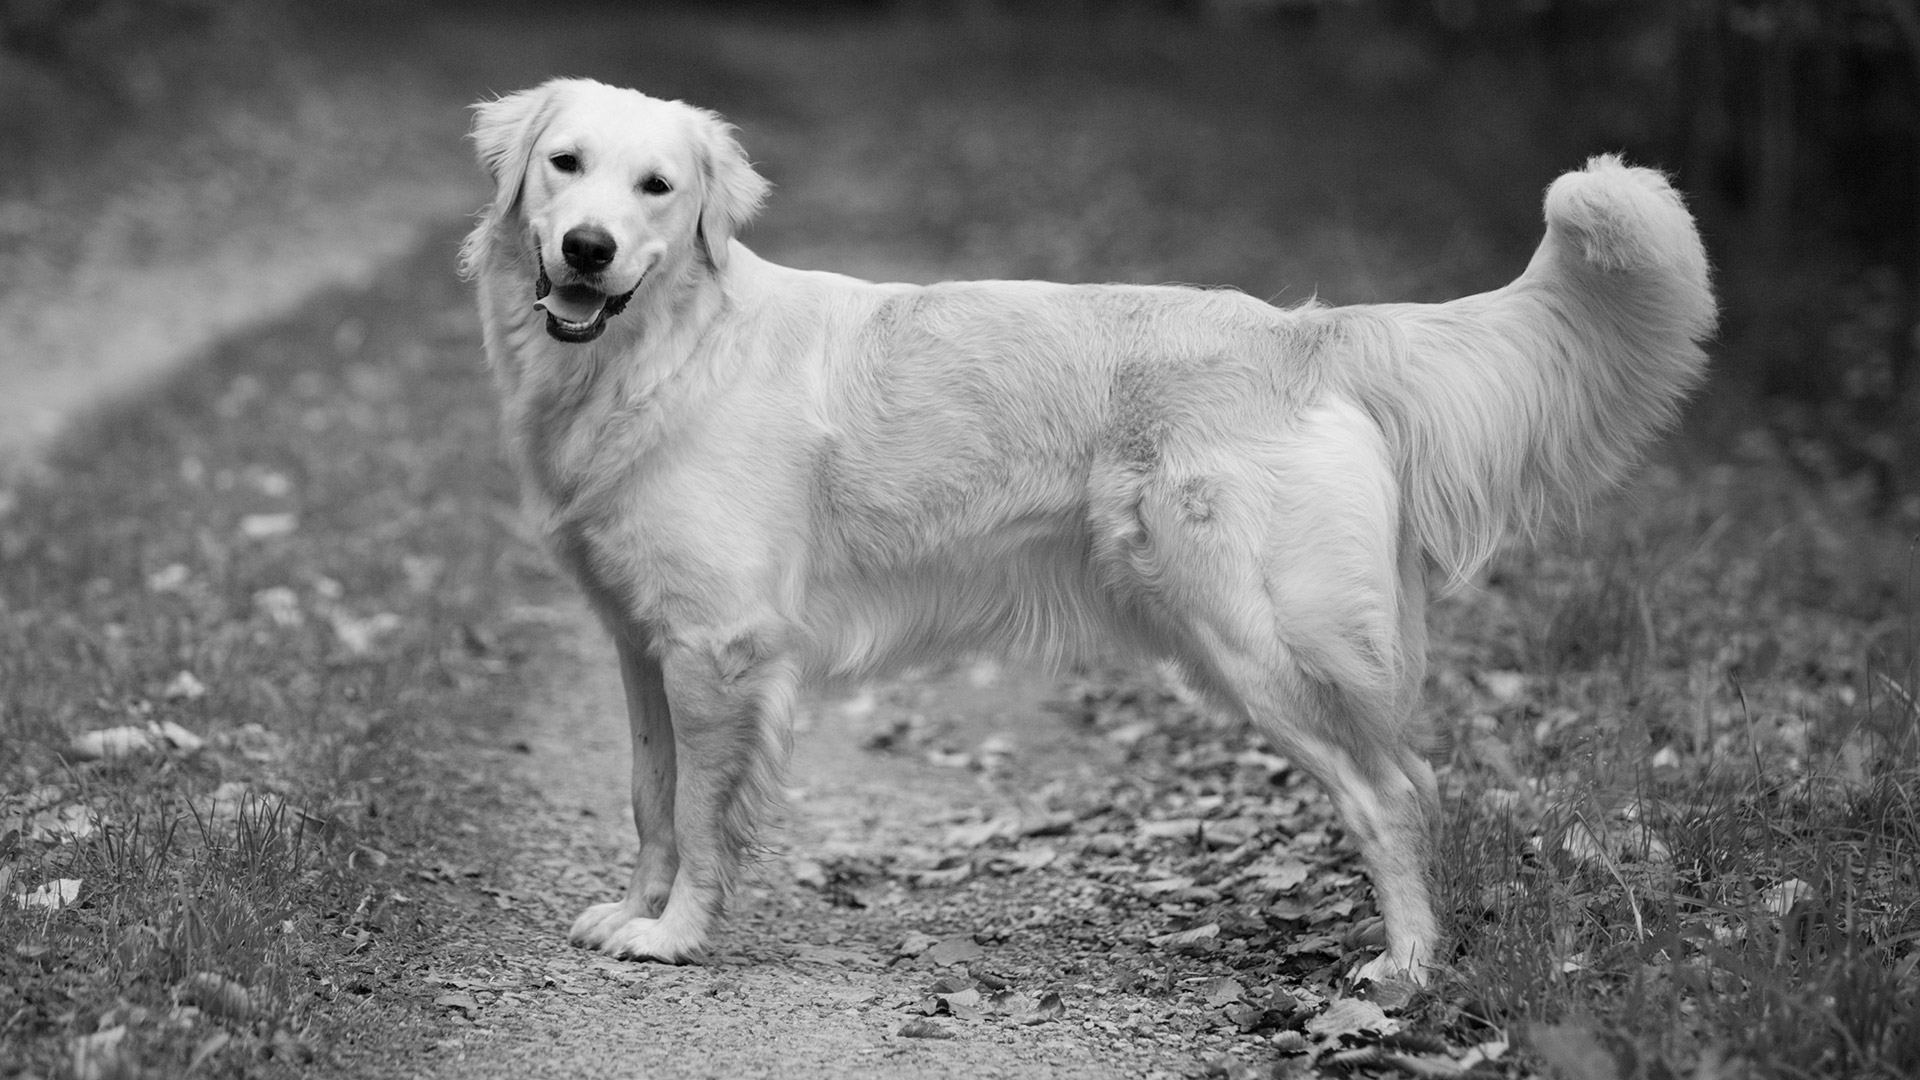

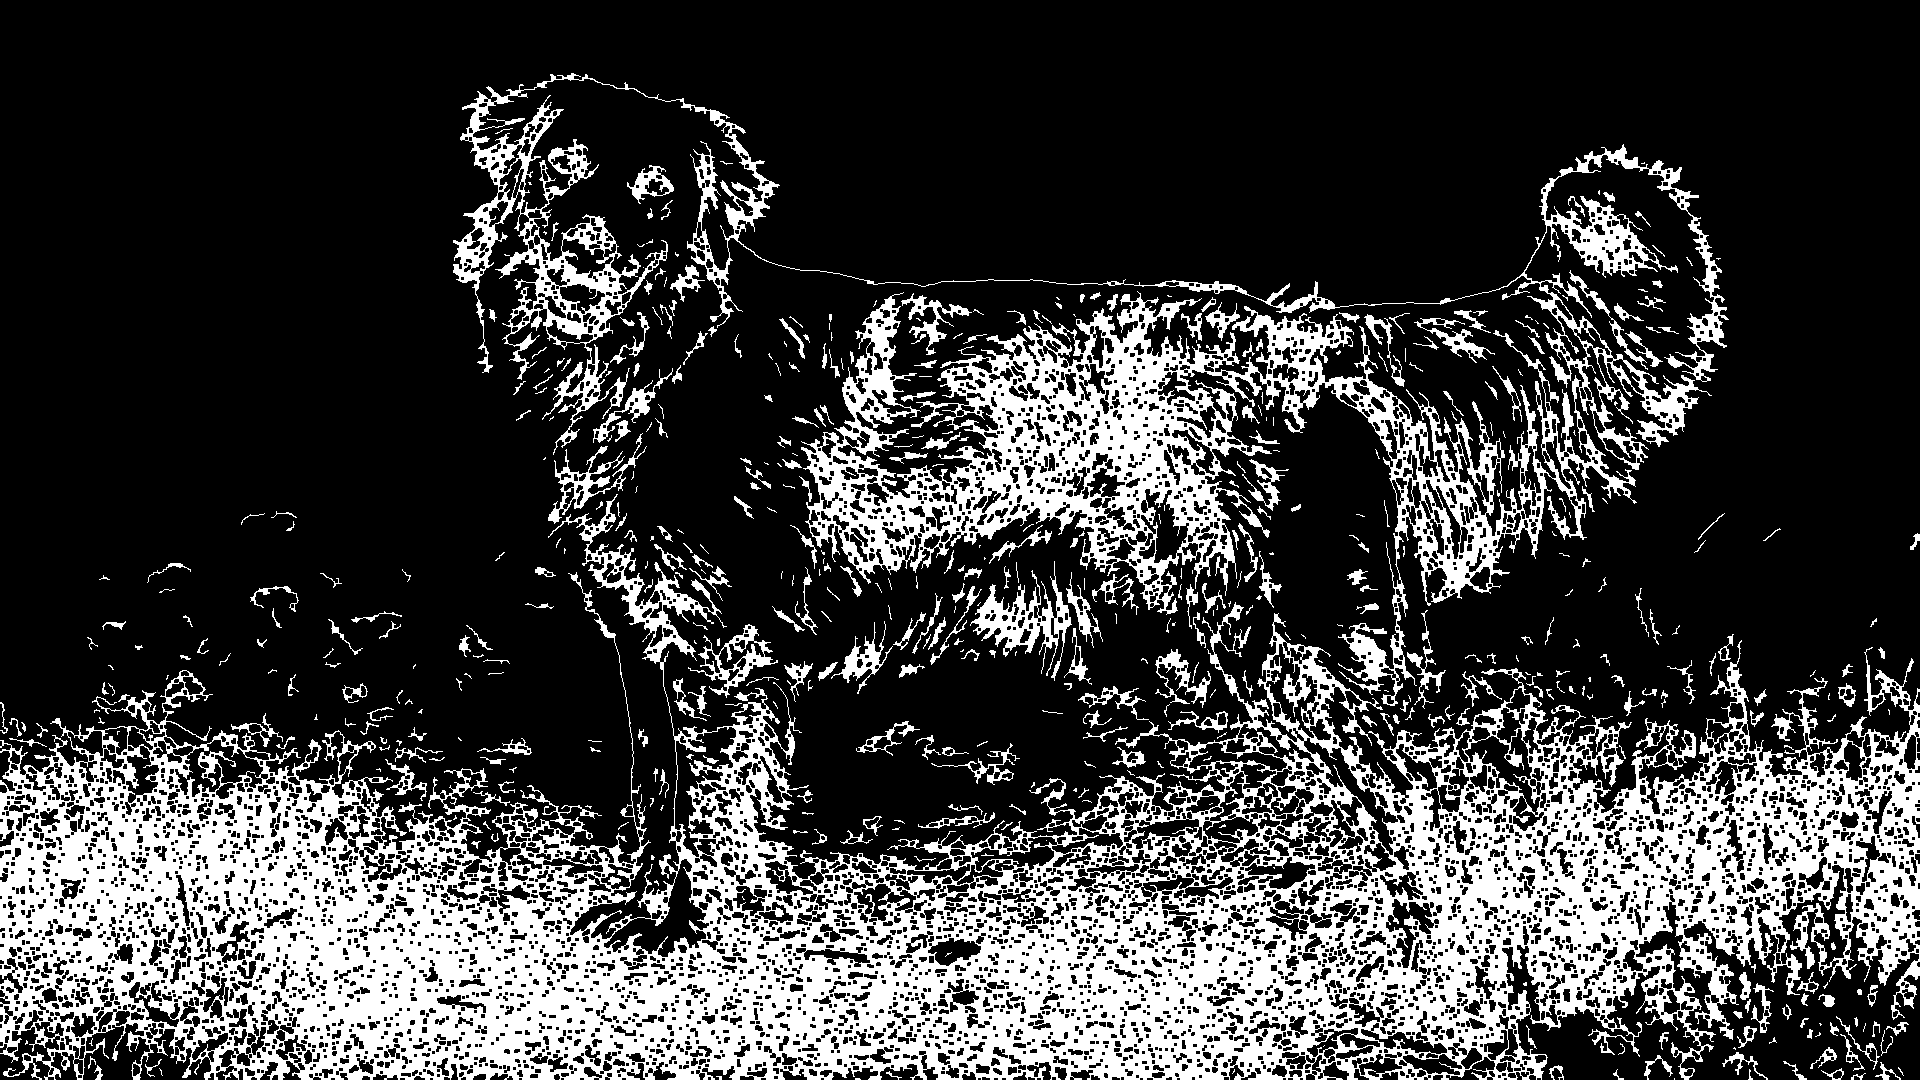

In [1]:
"""
Filename: init.py
Usage: This script will measure different objects in the frame using a reference object of known dimension. 
The object with known dimension must be the leftmost object.
"""
from scipy.spatial.distance import euclidean
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow

# Function to show array of images (intermediate results)

img_path = "/content/perro.jpg"

# Read image and preprocess
image = cv2.imread(img_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (1, 1), 0)
cv2_imshow(blur)
edged = cv2.Canny(blur, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

cv2_imshow(edged)


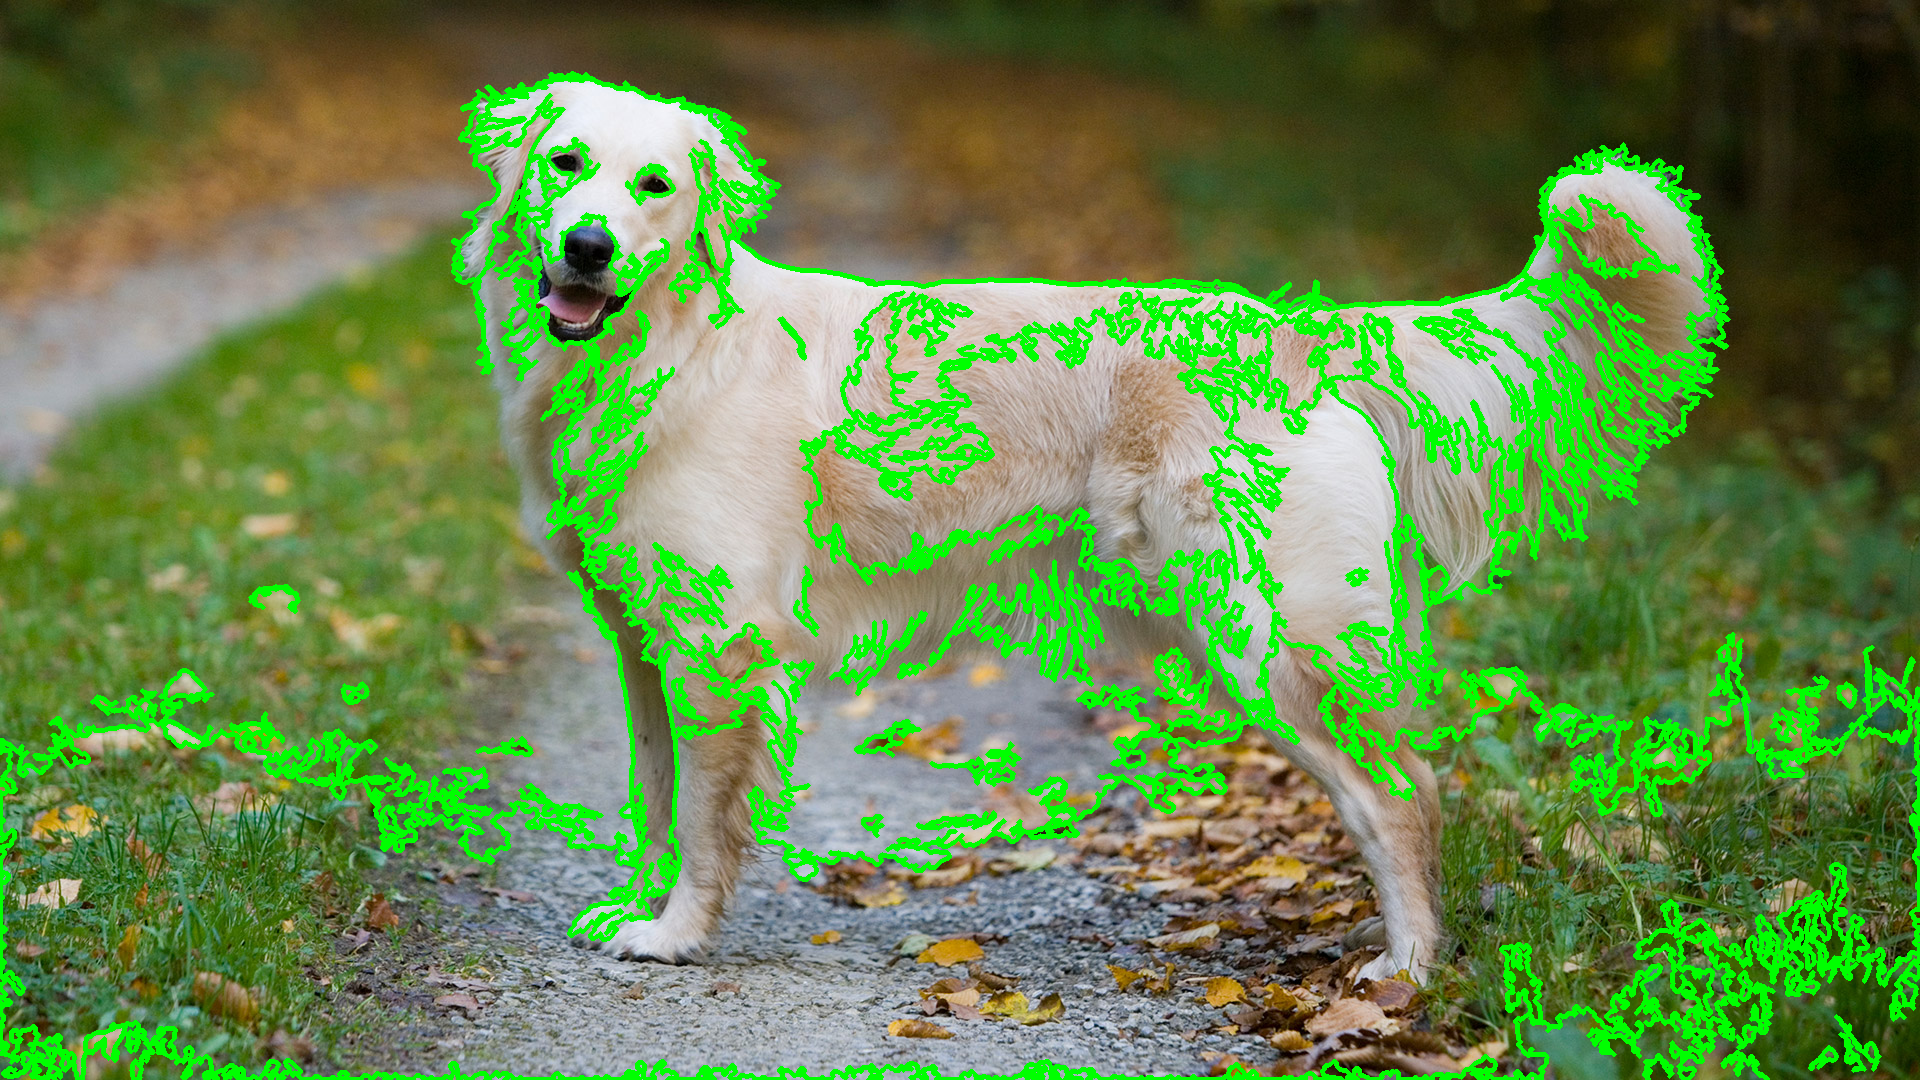

68


In [2]:
# Find contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Sort contours from left to right as leftmost contour is reference object
(cnts, _) = contours.sort_contours(cnts)

# Remove contours which are not large enough
cnts = [x for x in cnts if cv2.contourArea(x) > 100]

cv2.drawContours(image, cnts, -1, (0,255,0), 3)

cv2_imshow(image)
print(len(cnts))


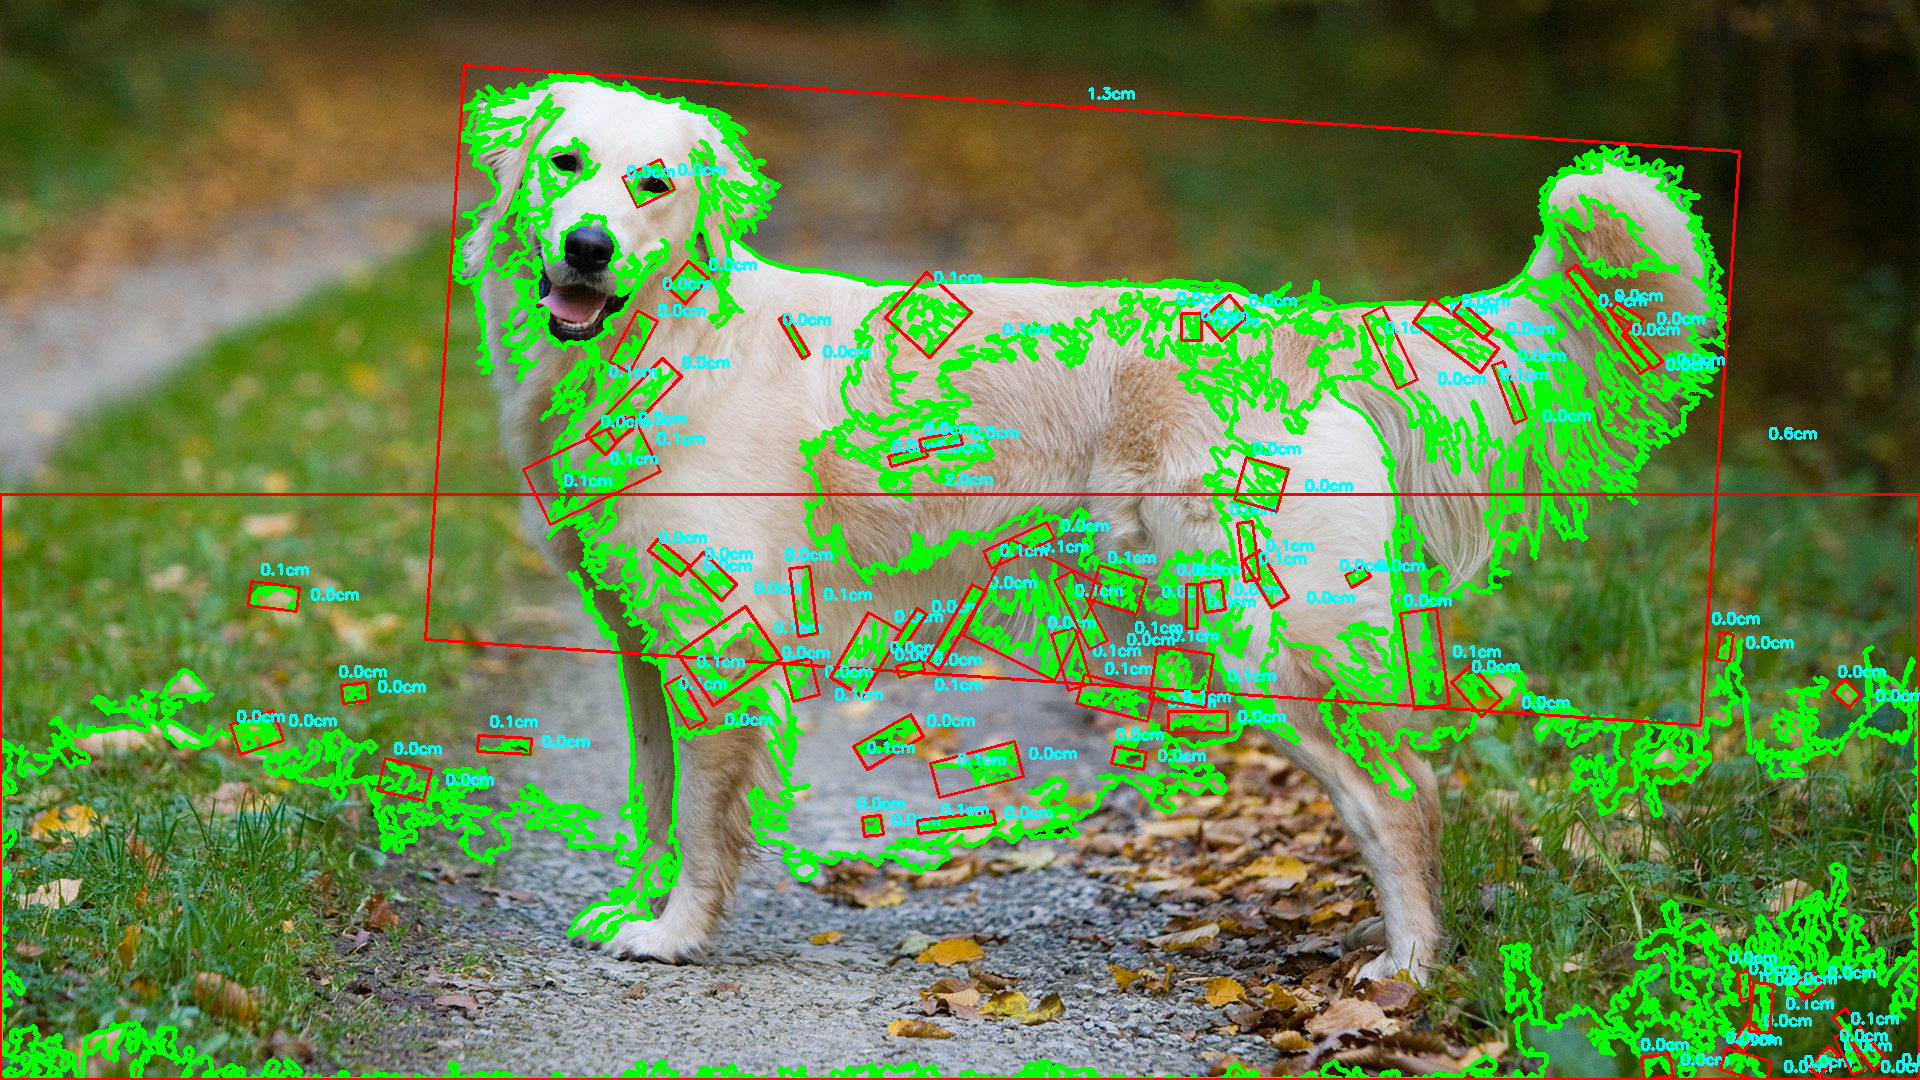

0.04427857272260943
0.01354872329338197
0.000599918129644526


In [3]:
# Reference object dimensions
# Here for reference I have used a 2cm x 2cm square
ref_object = cnts[0]
box = cv2.minAreaRect(ref_object)
box = cv2.boxPoints(box)
box = np.array(box, dtype="int")
box = perspective.order_points(box)
(tl, tr, br, bl) = box
dist_in_pixel = euclidean(tl, tr)
dist_in_cm = 2
pixel_per_cm = dist_in_pixel/dist_in_cm

# Draw remaining contours
for cnt in cnts:
	box = cv2.minAreaRect(cnt)
	box = cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	box = perspective.order_points(box)
	(tl, tr, br, bl) = box
	cv2.drawContours(image, [box.astype("int")], -1, (0, 0, 255), 2)
	mid_pt_horizontal = (tl[0] + int(abs(tr[0] - tl[0])/2), tl[1] + int(abs(tr[1] - tl[1])/2))
	mid_pt_verticle = (tr[0] + int(abs(tr[0] - br[0])/2), tr[1] + int(abs(tr[1] - br[1])/2))
	wid = euclidean(tl, tr)/pixel_per_cm
	ht = euclidean(tr, br)/pixel_per_cm
	cv2.putText(image, "{:.1f}cm".format(wid), (int(mid_pt_horizontal[0] - 15), int(mid_pt_horizontal[1] - 10)), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
	cv2.putText(image, "{:.1f}cm".format(ht), (int(mid_pt_verticle[0] + 10), int(mid_pt_verticle[1])), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

cv2_imshow(image)
print(wid)
print(ht)
area = wid*ht
print(area)


**ANOTHER OPTION WITH BETTER RESULTS**

White  126392


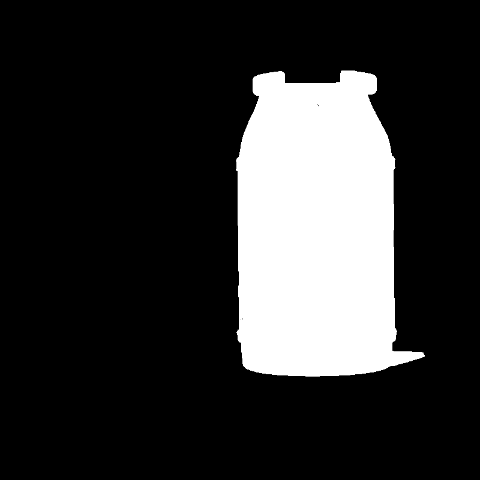

percentage 19.33782129742962


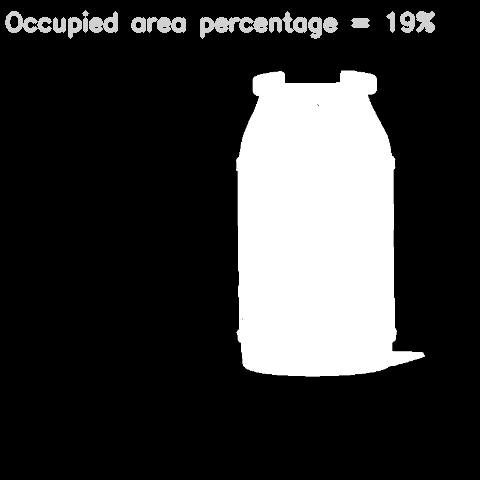

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/prueba28.jpg')

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (393,120,657,637)

#applying grabcut
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

#thresholding
cvimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(cvimg,0,255,cv2.THRESH_BINARY)

count = cv2.countNonZero(thresh)

print("White " , count)

resized_image = cv2.resize(thresh, (480,480))
cv2_imshow(resized_image)
#plt.imshow(img)
#plt.colorbar()
#plt.show()
(height, width, _) = img.shape
percentage =( count/(height*width) )*100
print("percentage",percentage)

position = (5,30)
text = "Occupied area percentage = " + str(int(percentage)) +"%"
cv2.putText(
     resized_image, #numpy array on which text is written
     text, #text
     position, #position at which writing has to start
     cv2.FONT_HERSHEY_SIMPLEX, #font family
     0.8, #font size
     (209, 80, 0, 255), #font color
     3) #font stroke
cv2.imwrite('output.png', resized_image)

cv2_imshow(cv2.imread('output.png'))

cv2.waitKey(0)
cv2.destroyAllWindows()